# Prediction using Unsupervised ML
### Author: Haseeb Ahmad
### Function: Data Science and Business Analytics
### Task 2: Predict the optimum number of clusters in Iris dataset and represent it visually.

Using the Iris dataset from the sklearn library to predict the optimum number of clusters using K-Means algorithm.

### Importing libraries

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets

### Loading the Iris dataset and storing it in dataframe

In [6]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


We can see that there are no null values in our dataset so we can proceed.

### Elbow technique

To find the optimum number of clusters for K Means we can use elbow method. The point after which there isn't any significant decrease in the sum of squared errors.

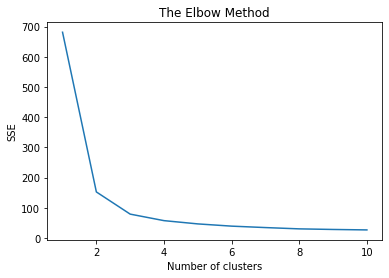

In [9]:
from sklearn.cluster import KMeans

k_range = range(1,11)
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter=300, n_init = 10, random_state = 0)
    kmeans.fit(iris_df)
    sse.append(kmeans.inertia_) # here inertia_ will calculate the sum of squared errors

# Plotting the results onto a line graph to observe the elbow
plt.plot(k_range,sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # within cluster sum of squared errors
plt.show()
    

We can see that our elbow is formed when number of clusters = 3 and after this value there isn't any significant decrease in the sum of squared errors with every iteration.

### Creating model with optimum number of clusters

In [11]:
# Applying kmeans to dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_predicted = kmeans.fit_predict(iris_df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

After fitting the model our data is categorized in 3 different clusters.

In [22]:
# creating a column for the predicted cluster in the dataframe
iris_df['cluster'] = y_predicted
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Viewing the target and target names in the iris dataset

In [20]:
# viewing the target and target names
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


We can assign these target names to our cluster. 

### Creating separate dataframe for each cluster and plotting them

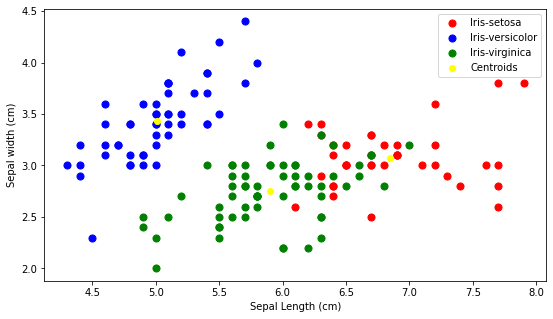

In [57]:
# creating separate dataframe for each cluster
df1 = iris_df[iris_df.cluster == 0]
df2 = iris_df[iris_df.cluster == 1]
df3 = iris_df[iris_df.cluster == 2]

# visualizing the cluster on the first two frames
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], s=50, color = 'red', label = 'Iris-setosa')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], s=50, color = 'blue', label = 'Iris-versicolor')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'], s=50, color = 'green', label = 'Iris-virginica')

# plotting the centroids of the clusters 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'yellow', label = 'Centroids')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()

plt.rcParams['figure.figsize'] = [10,6]
